<a href="https://colab.research.google.com/github/yGit741/comdepri/blob/main/accuracy_simulation_210121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import random
from numpy.core.numeric import NaN

In [3]:
def NG(k=0.5, s=0.5, n=12,current_aspect = 1):
    T = s**n
    B = (s**n)+(k**n)
    neural_gain = (T/B)*((-1)**current_aspect)
    return neural_gain


In [4]:
stim_sample = ['global','local']
aspect = [1, 0] #0 is for global, 1 is for local

In [5]:
#RT function, same as in R
def RT(k=0.5, global_s=0.55, local_s=0.45, n=12, upper_b=5, p_global=50, intention='global', congruent=True, max_iter=20000):
    #print ('RT in')
    p_local=100-p_global
    lower_b=-upper_b
    NG_sum = 0
    time = 0


    while NG_sum < upper_b and NG_sum > lower_b:
        current_sample = random.choices(stim_sample, weights=(p_global, p_local), k=1)

        #print(current_sample)
        current_aspect = 0 if current_sample == ['global'] else 1
        #print('aspect is', current_aspect)
        signal = global_s if current_sample == ['global'] else local_s
        #print('signal is', signal)
        gain = 0
        if congruent:
            if intention == 'global':
                gain = NG(k, signal, n, 0)
                NG_sum = NG_sum + gain
                time = time + 1
            else:
                gain = NG(k, signal, n, 1)
                NG_sum = NG_sum + gain
                time = time + 1
        else:
            gain = NG(k, signal, n, current_aspect)
            NG_sum = NG_sum + gain
            time = time + 1
        #print(time)
        #print(NG_sum)
        if time > max_iter:
            break

    if NG_sum >= upper_b:
        ans = 'global'
    if NG_sum <= lower_b:
        ans = 'local'
    #print ('RT out')
    return intention, ans, time


In [5]:
def df_accuracy(N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
    base_array = np.zeros(N)
    accuracy_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global)
    RT_array = np.array([accuracy_by_con(xi) for xi in base_array])
    df = pd.DataFrame(data=RT_array, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = base_array
    total = df['right'].sum()
    return total/N

#This function returns the fraction of times (out of N) a global boundary was reached based on the signal, n, and probability. 
#The function creates a dataframe but does not return the dataframe.   


In [ ]:
def plot_acc_by_prob(N=100, min=0, max=61, step = 1, global_s=0.55, local_s=0.45, n=12):
    prob_range = np.array(range(min,max,step))
    acc_by_prob = lambda y: df_accuracy(N=N, p_global=y, global_s=global_s, local_s=local_s, n=n)
    ar2 = np.array([acc_by_prob(yi) for yi in prob_range])
    plt.scatter(prob_range, ar2)
    plt.title('Accuracy by Probability')
    plt.xlabel('Global Probability')
    plt.ylabel('Accuracy (For Global)')
    return plt.show()

Accuracy by Probability Plot:
This plot shows the accuracy (fraction of times global boundaries are reached) by the probability. Other parameters can be altered to show how they affect the accuracy.


In [ ]:
_=interact(plot_acc_by_prob, n=(1.,15,1.), global_s =(0,1.,0.02), local_s=(0,1.,0.02))
print(_)


interactive(children=(IntSlider(value=100, description='N', max=300, min=-100), IntSlider(value=0, description…

<function plot_acc_by_prob at 0x7fb435340cb0>


In [21]:
def df_average(N=100, global_s=0.55, local_s=0.45, n=12, p_global=48, intention = 'global'):
    incon_array = np.zeros(N)
    rt_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global, intention = intention)
    ar = np.array([rt_by_con(xi) for xi in incon_array])
    df = pd.DataFrame(data=ar, columns=['intention', 'answer', 'time'])
    right_cat = ['1', '0']
    df['right'] = np.where(df['intention'] == df['answer'], '1', '0')
    df['right'] = df['right'].astype('category')
    df['right']=df['right'].cat.set_categories(right_cat)


    df['con'] = incon_array
    print('whole dataframe', '\n' , df)
    df['time'] = pd.to_numeric(df['time'])
    #df1 = df.loc[lambda df: df['right'] == 1]
    #accuracy = df1.shape[0]/N
    #print('acc by cut', accuracy)
    mean_by_right = df[['right', 'time']].groupby('right').agg(['count', 'mean']).reset_index()
    print("mean by right and wrong", '\n', mean_by_right)
    print(list(mean_by_right.columns))  
    #print(mean_by_right.shape)

    accuracy_of_right_decisions = mean_by_right[mean_by_right[('right','')] == '1'][('time', 'count')].values[0]/N
    average_of_right_decisions = mean_by_right[mean_by_right[('right','')] == '1'][('time', 'mean')].values[0]
    average_of_false_decisions = mean_by_right[mean_by_right[('right','')] == '0'][('time', 'mean')].values[0]
    
     



    return accuracy_of_right_decisions, average_of_right_decisions, average_of_false_decisions 

    
#This function creates a dataframe that returns the average RT of "right" decisions (by the intention set), the average of "false" decision s and the accuracy of the right decisions.


print('av time is',df_average(n=12, p_global = 25))

whole dataframe 
    intention  answer time right  con
0     global  global   35     1  0.0
1     global  global   90     1  0.0
2     global   local  170     0  0.0
3     global  global   52     1  0.0
4     global  global  131     1  0.0
..       ...     ...  ...   ...  ...
95    global  global  235     1  0.0
96    global  global   41     1  0.0
97    global  global  112     1  0.0
98    global  global   95     1  0.0
99    global  global  434     1  0.0

[100 rows x 5 columns]
mean by right and wrong 
   right  time            
        count        mean
0     1    83  144.012048
1     0    17  107.705882
[('right', ''), ('time', 'count'), ('time', 'mean')]
av time is (0.83, 144.0120481927711, 107.70588235294117)


[['1.0' '19.042' 'none']
 ['1.0' '21.374' 'none']
 ['1.0' '23.956' 'none']
 ['1.0' '26.71' 'none']
 ['1.0' '30.7' 'none']
 ['1.0' '34.398' 'none']
 ['0.998' '42.42685370741483' '31.0']
 ['1.0' '49.314' 'none']
 ['1.0' '58.08' 'none']
 ['0.98' '79.31428571428572' '94.9']
 ['0.94' '106.88936170212766' '127.93333333333334']
 ['0.862' '128.77494199535963' '130.91304347826087']
 ['0.686' '177.40816326530611' '156.87261146496814']
 ['0.338' '200.6094674556213' '194.8821752265861']
 ['0.2' '195.16' '164.9075']
 ['0.076' '148.1578947368421' '144.6147186147186']
 ['0.024' '116.83333333333333' '113.13319672131148']
 ['0.016' '93.75' '91.26422764227642']
 ['0' 'none' '79.84']
 ['0' 'none' '69.092']
 ['0.002' '78.0' '60.48496993987976']
 ['0' 'none' '54.862']
 ['0' 'none' '50.916']]
now in float: 
 [19.042, 21.374, 23.956, 26.71, 30.7, 34.398, 42.42685370741483, 49.314, 58.08, 79.31428571428572, 106.88936170212766, 128.77494199535963, 177.40816326530611, 200.6094674556213, 195.16, 148.157894736842

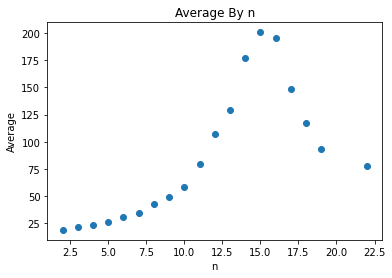

Local Intention by n (global prob. = 0.18) 
 (None, [19.042, 21.374, 23.956, 26.71, 30.7, 34.398, 42.42685370741483, 49.314, 58.08, 79.31428571428572, 106.88936170212766, 128.77494199535963, 177.40816326530611, 200.6094674556213, 195.16, 148.1578947368421, 116.83333333333333, 93.75, nan, nan, 78.0, nan, nan], array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]))
[['0.756' '97.25132275132275' '102.55737704918033']
 ['0.914' '80.2691466083151' '79.55813953488372']
 ['0.974' '61.02258726899384' '83.0']
 ['0.99' '51.24040404040404' '50.8']
 ['0.998' '42.02805611222445' '63.0']
 ['1.0' '35.582' 'none']
 ['1.0' '31.516' 'none']
 ['1.0' '27.65' 'none']
 ['1.0' '24.992' 'none']
 ['1.0' '22.92' 'none']
 ['1.0' '21.564' 'none']
 ['1.0' '19.63' 'none']
 ['1.0' '18.586' 'none']
 ['1.0' '17.76' 'none']
 ['1.0' '16.824' 'none']
 ['1.0' '16.404' 'none']
 ['1.0' '15.842' 'none']
 ['1.0' '15.192' 'none']
 ['1.0' '14.932' 'none']
 ['1.0' '14.97' 'non

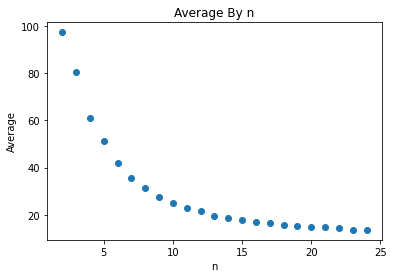

Global Intention by n (global prob. = 0.47) 
 (None, [97.25132275132275, 80.2691466083151, 61.02258726899384, 51.24040404040404, 42.02805611222445, 35.582, 31.516, 27.65, 24.992, 22.92, 21.564, 19.63, 18.586, 17.76, 16.824, 16.404, 15.842, 15.192, 14.932, 14.97, 14.512, 13.752, 13.674], array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]))
[['0' 'none' '30.668']
 ['0.002' '56.0' '36.04208416833667']
 ['0.002' '74.0' '43.811623246492985']
 ['0.012' '43.666666666666664' '53.459514170040485']
 ['0.032' '63.4375' '68.23347107438016']
 ['0.096' '95.29166666666667' '86.03761061946902']
 ['0.17' '114.96470588235294' '113.57831325301204']
 ['0.424' '135.83962264150944' '154.37847222222223']
 ['0.686' '143.28279883381924' '156.93630573248407']
 ['0.868' '108.58064516129032' '140.86363636363637']
 ['0.95' '83.19157894736843' '102.28']
 ['0.988' '75.90485829959515' '67.83333333333333']
 ['0.996' '59.359437751004016' '61.5']
 ['1.0' '53.162' 'n

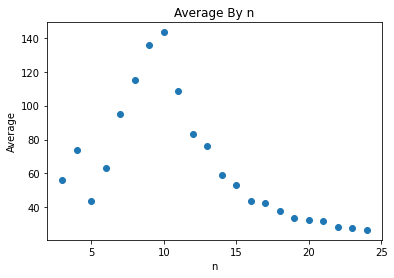

[['1.0' '19.344' 'none']
 ['1.0' '20.706' 'none']
 ['1.0' '24.232' 'none']
 ['1.0' '27.096' 'none']
 ['1.0' '31.43' 'none']
 ['1.0' '35.352' 'none']
 ['1.0' '42.056' 'none']
 ['0.998' '51.66733466933868' '45.0']
 ['0.996' '62.31124497991968' '47.5']
 ['0.984' '81.57723577235772' '69.25']
 ['0.942' '101.67515923566879' '105.82758620689656']
 ['0.87' '140.32183908045977' '117.56923076923077']
 ['0.686' '171.89795918367346' '179.15923566878982']
 ['0.394' '221.63959390862945' '182.97359735973598']
 ['0.196' '176.26530612244898' '171.76119402985074']
 ['0.104' '169.42307692307693' '141.41517857142858']
 ['0.024' '109.83333333333333' '112.32377049180327']
 ['0.004' '112.5' '92.0421686746988']
 ['0' 'none' '74.378']
 ['0' 'none' '70.556']
 ['0' 'none' '61.544']
 ['0' 'none' '57.086']
 ['0' 'none' '51.882']]
now in float: 
 [19.344, 20.706, 24.232, 27.096, 31.43, 35.352, 42.056, 51.66733466933868, 62.31124497991968, 81.57723577235772, 101.67515923566879, 140.32183908045977, 171.89795918367346

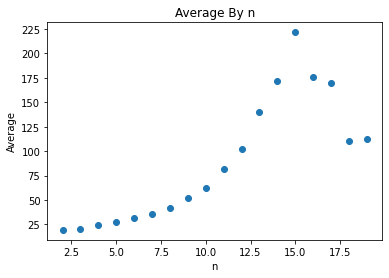

(nan, 19.344)
(56.0, 20.706)
(74.0, 24.232)
(43.666666666666664, 27.096)
(63.4375, 31.43)
(95.29166666666667, 35.352)
(114.96470588235294, 42.056)
(135.83962264150944, 51.66733466933868)
(143.28279883381924, 62.31124497991968)
(108.58064516129032, 81.57723577235772)
(83.19157894736843, 101.67515923566879)
(75.90485829959515, 140.32183908045977)
(59.359437751004016, 171.89795918367346)
(53.162, 221.63959390862945)
(43.70741482965932, 176.26530612244898)
(42.37, 169.42307692307693)
(37.956, 109.83333333333333)
(33.612, 112.5)
(32.642, nan)
(31.706, nan)
(28.558, nan)
(27.598, nan)
(26.7, nan)
[nan, -35.294, -49.768, -16.570666666666664, -32.0075, -59.939666666666675, -72.90870588235295, -84.17228797217075, -80.97155385389956, -27.003409388932596, 18.48358028830036, 64.41698078086462, 112.53852143266946, 168.47759390862944, 132.55789129278966, 127.05307692307693, 71.87733333333333, 78.888, nan, nan, nan, nan, nan]


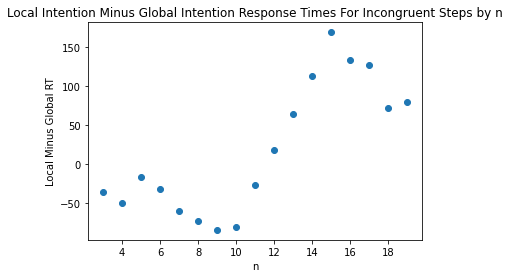

None


In [ ]:
#graph of averages by n, graph of global precedence by n
def plot_average_by_n(N=500, min=2, max=25, step = 1, global_s=0.55, local_s=0.45, p_global =50, intention = 'global'):
    n_range = np.array(range(min,max,step))
    av_by_n = lambda y: df_average(N=N, p_global=p_global, global_s=global_s, local_s=local_s, n=y, intention=intention)
    ar_av = np.array([av_by_n(yi) for yi in n_range])
    print(ar_av)
    average_for_plot = ar_av[:,1]
    average_for_plot_list = []
    for i in average_for_plot:
      if i == 'none':
        average_for_plot_list.append(np.nan)
      else:
        average_for_plot_list.append(float(i)) 
    #average_for_plot_float_array = [float(i) for i in average_for_plot if i != 'none']
    #print("average for plot:", '\n', average_for_plot)
    print("now in float:", '\n', average_for_plot_list)
    plt.scatter(n_range, average_for_plot_list)
    plt.title('Average By n')
    plt.xlabel('n')
    plt.ylabel('Average')
    plot = plt.show()
    return plot, average_for_plot_list, n_range

print("Local Intention by n (global prob. = 0.18)", '\n', plot_average_by_n(p_global=18, intention = 'local'))  
print("Global Intention by n (global prob. = 0.47)", '\n', plot_average_by_n(p_global=48, intention = 'global'))
#This function uses the averages created by df_average based on each n given.
#It returns a plot, and also the list of averages used to create the plot (y values), and the range of n used (x valuse).

def plot_almost_global_precedence_by_n(p_global_for_global=28, p_global_for_local=18 ):
  p1, global_array_by_n, n_range = plot_average_by_n(p_global=p_global_for_global, intention = 'global')
  p2, local_array_by_n, n_range_2 = plot_average_by_n(p_global = p_global_for_local, intention = 'local')
  almost_global_precedence_list = []
  for i in zip(global_array_by_n, local_array_by_n):
    print(i)
    if np.nan in i: 
      almost_global_precedence_list.append(np.nan)
    else:
      almost_global_precedence_list.append(i[1]-i[0])
  print(almost_global_precedence_list)    
  plt.scatter(n_range, almost_global_precedence_list) 
  plt.ylabel('Local Minus Global RT') 
  plt.xlabel('n') 
  plt.title("Local Intention Minus Global Intention Response Times For Incongruent Steps by n")
  plt.show()
  return

print(plot_almost_global_precedence_by_n())  
#This function recieves two parameters - the probability in the case of a global intention, and the probability in the case of a local intention.
#Then, plot_average_by_n is run for each intention, and the arrays are subtracted from each other (local minus global) to give an idea of the global precedence by each n.
#This is not completely global precedence - because congruent steps are not taken into account.

      



[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[0.53 0.55 0.57 0.59 0.61 0.63 0.65 0.67 0.69]
135
[0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46
 0.48]
[[0.53, 0.2, False, 1.0, 399.6, 'none'], [0.53, 0.22, False, 1.0, 397.29, 'none'], [0.53, 0.24, False, 1.0, 404.76, 'none'], [0.53, 0.26, False, 1.0, 373.49, 'none'], [0.53, 0.27999999999999997, False, 1.0, 399.28, 'none'], [0.53, 0.29999999999999993, False, 1.0, 477.96, 'none'], [0.53, 0.31999999999999995, False, 1.0, 571.98, 'none'], [0.53, 0.33999999999999997, False, 0.99, 1263.7070707070707, 1917.0], [0.53, 0.35999999999999993, True, 0.01, 1996.0, 1041.3434343434344], [0.53, 0.3799999999999999, True, 0, 'none', 236.38], [0.53, 0.3999999999999999, True, 0, 'none', 102.53], [0.53, 0.41999999999999993, True, 0, 'none', 54.12], [0.53, 0.4399999999999999, True, 0, 'none', 31.98], [0.53, 0.4599999999999999, True, 0, 'none', 20.73], [0.53, 0.47999999999999987, True, 0, 'none', 14.58], [0.55, 

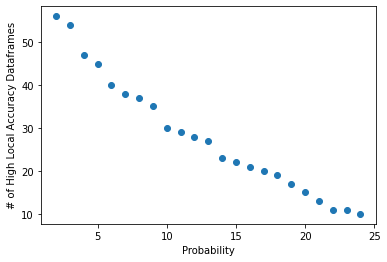

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[0.53 0.55 0.57 0.59 0.61 0.63 0.65 0.67 0.69]
135
[0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46
 0.48]
[[0.53, 0.2, False, 1.0, 711.96, 'none'], [0.53, 0.22, False, 1.0, 1066.02, 'none'], [0.53, 0.24, False, 0.46, 3263.021739130435, 3507.962962962963], [0.53, 0.26, True, 0, 'none', 696.55], [0.53, 0.27999999999999997, True, 0, 'none', 281.77], [0.53, 0.29999999999999993, True, 0, 'none', 160.66], [0.53, 0.31999999999999995, True, 0, 'none', 98.57], [0.53, 0.33999999999999997, True, 0, 'none', 66.86], [0.53, 0.35999999999999993, True, 0, 'none', 45.56], [0.53, 0.3799999999999999, True, 0, 'none', 34.12], [0.53, 0.3999999999999999, True, 0, 'none', 26.48], [0.53, 0.41999999999999993, True, 0, 'none', 21.15], [0.53, 0.4399999999999999, True, 0, 'none', 16.78], [0.53, 0.4599999999999999, True, 0, 'none', 14.49], [0.53, 0.47999999999999987, True, 0, 'none', 12.45], [0.55, 0.2, False, 1.0, 605.16

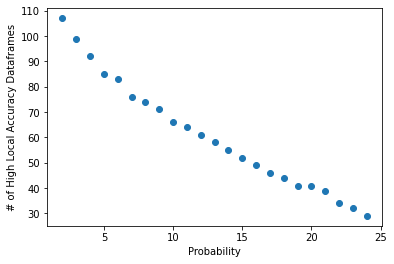

In [8]:
def optimal_prob_df(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, acc_bound = 0.2, av_bound = 100, n=12, prob_min =2, prob_max = 25):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy", "av global", "av local" ]


    prob_array = np.array(range(prob_min,prob_max,1))
    print(prob_array)
    glob_array = np.arange(globalmin,globalmax,0.02)
    print(glob_array)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array)*len(loc_array)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d_for_accuracy = []
        for x in glob_array:
            for y in loc_array:
              acc, av_global, av_local = df_average(N=100, global_s=x, local_s=y, p_global=p, n=n)
              if acc > acc_bound:
                  d_for_accuracy.append([x,y,False, acc, av_global, av_local])
              else:
                  d_for_accuracy.append([x,y,True, acc, av_global, av_local])
        print(d_for_accuracy)
        prob_work_array = np.array([d_for_accuracy[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_of_true_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.xlabel("Probability")
    plt.ylabel("# of High Local Accuracy Dataframes")
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return

optimal_prob_df(n=12)
optimal_prob_df(n=6)
#This is a new function trying to answer the question - is there a probability that would work for more signals than the signals we use? 
#The plot returning demonstrates the number of times a combination of global signal, local signal and probability was able to reach local boundaries "most of the time".

In [ ]:
#optimal_prob_by_average
def optimal_prob_by_average(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, average_bound = 200):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy"]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array_for_av = np.arange(globalmin,globalmax,0.02)
    print(glob_array_for_av)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array_for_av)*len(loc_array_for_av)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d = []
        for x in glob_array:
            for y in loc_array:
                acc = df_accuracy(N=100, global_s=x, local_s=y, p_global=p)
                if acc > acc_bound:
                    d.append([x,y,False, acc])
                else:
                    d.append([x,y,True, acc])
        print(d)
        prob_work_array = np.array([d[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return